# Prosper Loan Data Analysis

## Investigation Overview






In this investigation, I want to look at the characteristics of loans and their sub categories. The main focus is on borrower rate, state, income range, listing category, monthly loan payment and stated monthly income.

## Dataset Overview

The "Prosper Loan Data" consists of loan info and attributes of loans with approximately 113.000 records. The attributes include the listing keys, numbers, creation date etc. of loans, as well as additional measurements such as credit grade, term and status of loans. I have excluded some data from the original data for analysis due to missing information and the details for removing them are shown below.

In [369]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [370]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('Prosper Loan Data.csv')

In [371]:
loan_df=df.copy()
loan_df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.0,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [372]:
#These are the columns for my data analysis.
columns_list=['BorrowerRate','BorrowerState','IncomeRange', 'Investors', 'ListingCategory (numeric)', 'LoanStatus','MonthlyLoanPayment','StatedMonthlyIncome','Term']
columns_list

['BorrowerRate',
 'BorrowerState',
 'IncomeRange',
 'Investors',
 'ListingCategory (numeric)',
 'LoanStatus',
 'MonthlyLoanPayment',
 'StatedMonthlyIncome',
 'Term']

In [373]:
loan_df=loan_df.loc[:,columns_list]
pd.options.display.max_columns = None #pd.options.display.max_rows=None for rows
loan_df.head(3)

,BorrowerRate,BorrowerState,IncomeRange,Investors,ListingCategory (numeric),LoanStatus,MonthlyLoanPayment,StatedMonthlyIncome,Term
0,0.158,CO,"$25,000-49,999",258,0,Completed,330.43,3083.333333,36
1,0.092,CO,"$50,000-74,999",1,2,Current,318.93,6125.000000,36
2,0.275,GA,Not displayed,41,0,Completed,123.32,2083.333333,36


In [374]:
loan_df.shape

(113937, 9)

In [375]:
loan_df.isna().sum() #I removed the missing na values in here. 

BorrowerRate                    0
BorrowerState                5515
IncomeRange                     0
Investors                       0
ListingCategory (numeric)       0
LoanStatus                      0
MonthlyLoanPayment              0
StatedMonthlyIncome             0
Term                            0
dtype: int64

In [376]:
loan_df=loan_df.dropna() #Checking the removed missing na values. 
loan_df.isna().sum()

BorrowerRate                 0
BorrowerState                0
IncomeRange                  0
Investors                    0
ListingCategory (numeric)    0
LoanStatus                   0
MonthlyLoanPayment           0
StatedMonthlyIncome          0
Term                         0
dtype: int64

In [377]:
loan_df.shape

(108422, 9)

In [378]:
loan_df.dtypes

BorrowerRate                 float64
BorrowerState                 object
IncomeRange                   object
Investors                      int64
ListingCategory (numeric)      int64
LoanStatus                    object
MonthlyLoanPayment           float64
StatedMonthlyIncome          float64
Term                           int64
dtype: object

In [379]:
# convert BorrowerState, IncomeRange and LoanStatus into ordered categorical types
ordinal_var_dict = {'IncomeRange': ['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
                        '$75,000-99,999', '$1-24,999', 'Not employed','$0'],
                        'LoanStatus': ['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
                        'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
                        'Past Due (61-90 days)', 'Past Due (31-60 days)',
                        'Past Due (91-120 days)', 'FinalPaymentInProgress',
                        'Past Due (>120 days)'],
                   'BorrowerState':['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', 'AL', 'AZ',
       'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
       'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
       'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
       'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'],
                   }
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_df[var] = loan_df[var].astype(ordered_var)

In [380]:
loan_df.describe()

,BorrowerRate,Investors,ListingCategory (numeric),MonthlyLoanPayment,StatedMonthlyIncome,Term
count,108422.000000,108422.000000,108422.000000,108422.000000,1.084220e+05,108422.000000
mean,0.193353,80.364631,2.914086,276.705326,5.650840e+03,41.075944
std,0.075169,103.941763,4.046880,192.538718,7.593941e+03,10.639901
min,0.000000,1.000000,0.000000,0.000000,0.000000e+00,12.000000
25%,0.134500,1.000000,1.000000,135.920000,3.250000e+03,36.000000
50%,0.184000,43.000000,1.000000,225.320000,4.708333e+03,36.000000
75%,0.252000,115.000000,3.000000,375.720000,6.833333e+03,36.000000
max,0.360000,1189.000000,20.000000,2251.510000,1.750003e+06,60.000000


In [381]:
#We changed the listing category from numbers into categories in here. 
listing_category_dict={0:'Not Available', 1 :'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4 : 'Personal Loan', 
      5:'Student Use', 6 : 'Auto', 7: 'Other',8:'Baby&Adoption', 9:'Boat',10 :'Cosmetic Procedure', 
      11:'Engagement Ring', 12 :'Green Loans', 13:'Household Expenses', 
      14: 'Large Purchases',15:'Medical/Dental',16:'Motorcycle',17:'RV', 
      18 :'Taxes', 19 :'Vacation', 20:'Wedding Loans'}

In [382]:
loan_df['ListingCategory']=loan_df['ListingCategory (numeric)'].map(listing_category_dict)

In [383]:
loan_df.drop(['ListingCategory (numeric)'],axis=1,inplace=True)
loan_df.head(3)

,BorrowerRate,BorrowerState,IncomeRange,Investors,LoanStatus,MonthlyLoanPayment,StatedMonthlyIncome,Term,ListingCategory
0,0.158,CO,"$25,000-49,999",258,Completed,330.43,3083.333333,36,Not Available
1,0.092,CO,"$50,000-74,999",1,Current,318.93,6125.000000,36,Home Improvement
2,0.275,GA,Not displayed,41,Completed,123.32,2083.333333,36,Not Available


In [384]:
loan_df['ListingCategory']=loan_df['ListingCategory'].astype('category')

In [385]:
loan_df['StatedMonthlyIncome']=loan_df['StatedMonthlyIncome'].round(0).astype('str').str[:-2].astype(int)

In [386]:
loan_df['StatedMonthlyIncome'].head()

0    3083
1    6125
2    2083
3    2875
4    9583
Name: StatedMonthlyIncome, dtype: int32

In [387]:
loan_df.dtypes

BorrowerRate            float64
BorrowerState          category
IncomeRange            category
Investors                 int64
LoanStatus             category
MonthlyLoanPayment      float64
StatedMonthlyIncome       int32
Term                      int64
ListingCategory        category
dtype: object

In [388]:
#Selecting categorical values
loan_categorical_df=loan_df.select_dtypes(include=['category','bool'])

In [389]:
#Selecting numeric values
loan_numeric_df=loan_df.select_dtypes(include=np.number)

In [390]:
#Removing outliers from numeric values 
from scipy import stats 
loan_numeric_df=loan_numeric_df[(np.abs(stats.zscore(loan_numeric_df)<3).all(axis=1))]
loan_numeric_df.head()

,BorrowerRate,Investors,MonthlyLoanPayment,StatedMonthlyIncome,Term
0,0.1580,258,330.43,3083,36
1,0.0920,1,318.93,6125,36
2,0.2750,41,123.32,2083,36
3,0.0974,158,321.45,2875,36
4,0.2085,20,563.97,9583,36


In [391]:
loan_numeric_df.describe()

,BorrowerRate,Investors,MonthlyLoanPayment,StatedMonthlyIncome,Term
count,104598.000000,104598.000000,104598.000000,104598.000000,104598.000000
mean,0.195145,71.088635,259.393624,5359.977734,41.197270
std,0.075327,83.942557,165.722446,3328.026186,10.656007
min,0.000000,1.000000,0.000000,0.000000,12.000000
25%,0.135500,1.000000,133.500000,3199.250000,36.000000
50%,0.187000,41.000000,214.980000,4583.000000,36.000000
75%,0.256100,108.000000,360.320000,6667.000000,36.000000
max,0.360000,392.000000,853.960000,28333.000000,60.000000


In [392]:
loan_numeric_df.isna().sum()

BorrowerRate           0
Investors              0
MonthlyLoanPayment     0
StatedMonthlyIncome    0
Term                   0
dtype: int64

In [393]:
loan_numeric_df.shape

(104598, 5)

In [394]:
loan_categorical_df.shape

(108422, 4)

In [395]:
loan_categorical_df.isna().sum()

BorrowerState      0
IncomeRange        0
LoanStatus         0
ListingCategory    0
dtype: int64

In [396]:
loan_df.shape

(108422, 9)

In [397]:
loan_numeric_df.head()

,BorrowerRate,Investors,MonthlyLoanPayment,StatedMonthlyIncome,Term
0,0.1580,258,330.43,3083,36
1,0.0920,1,318.93,6125,36
2,0.2750,41,123.32,2083,36
3,0.0974,158,321.45,2875,36
4,0.2085,20,563.97,9583,36


In [398]:
loan_categorical_df.head()

,BorrowerState,IncomeRange,LoanStatus,ListingCategory
0,CO,"$25,000-49,999",Completed,Not Available
1,CO,"$50,000-74,999",Current,Home Improvement
2,GA,Not displayed,Completed,Not Available
3,GA,"$25,000-49,999",Current,Motorcycle
4,MN,"$100,000+",Current,Home Improvement


In [399]:
loan_df=pd.concat([loan_categorical_df,loan_numeric_df],axis=1)
loan_df.head()

,BorrowerState,IncomeRange,LoanStatus,ListingCategory,BorrowerRate,Investors,MonthlyLoanPayment,StatedMonthlyIncome,Term
0,CO,"$25,000-49,999",Completed,Not Available,0.1580,258.0,330.43,3083.0,36.0
1,CO,"$50,000-74,999",Current,Home Improvement,0.0920,1.0,318.93,6125.0,36.0
2,GA,Not displayed,Completed,Not Available,0.2750,41.0,123.32,2083.0,36.0
3,GA,"$25,000-49,999",Current,Motorcycle,0.0974,158.0,321.45,2875.0,36.0
4,MN,"$100,000+",Current,Home Improvement,0.2085,20.0,563.97,9583.0,36.0


In [400]:
loan_df.isna().sum() #Checking missing values again and 
                     #for the analysis I remove the missing na values after excluding outliers.

BorrowerState             0
IncomeRange               0
LoanStatus                0
ListingCategory           0
BorrowerRate           3824
Investors              3824
MonthlyLoanPayment     3824
StatedMonthlyIncome    3824
Term                   3824
dtype: int64

In [401]:
loan_df=loan_df.dropna()
loan_df.shape

(104598, 9)

In [402]:
loan_df.columns[loan_df.isnull().any()] #Checking na values in here. 

Index([], dtype='object')

In [403]:
loan_df.head()

,BorrowerState,IncomeRange,LoanStatus,ListingCategory,BorrowerRate,Investors,MonthlyLoanPayment,StatedMonthlyIncome,Term
0,CO,"$25,000-49,999",Completed,Not Available,0.1580,258.0,330.43,3083.0,36.0
1,CO,"$50,000-74,999",Current,Home Improvement,0.0920,1.0,318.93,6125.0,36.0
2,GA,Not displayed,Completed,Not Available,0.2750,41.0,123.32,2083.0,36.0
3,GA,"$25,000-49,999",Current,Motorcycle,0.0974,158.0,321.45,2875.0,36.0
4,MN,"$100,000+",Current,Home Improvement,0.2085,20.0,563.97,9583.0,36.0


In [404]:
loan_df.IncomeRange.value_counts() #We see some $0 values in here we will remove them.

$25,000-49,999    31268
$50,000-74,999    30046
$75,000-99,999    16057
$100,000+         15082
$1-24,999          7011
Not displayed      3804
Not employed        778
$0                  552
Name: IncomeRange, dtype: int64

In [405]:
loan_df=loan_df[(loan_df['IncomeRange']!='$0')]
loan_df.head()

,BorrowerState,IncomeRange,LoanStatus,ListingCategory,BorrowerRate,Investors,MonthlyLoanPayment,StatedMonthlyIncome,Term
0,CO,"$25,000-49,999",Completed,Not Available,0.1580,258.0,330.43,3083.0,36.0
1,CO,"$50,000-74,999",Current,Home Improvement,0.0920,1.0,318.93,6125.0,36.0
2,GA,Not displayed,Completed,Not Available,0.2750,41.0,123.32,2083.0,36.0
3,GA,"$25,000-49,999",Current,Motorcycle,0.0974,158.0,321.45,2875.0,36.0
4,MN,"$100,000+",Current,Home Improvement,0.2085,20.0,563.97,9583.0,36.0


In [406]:
loan_df.shape #We removed 552 $0s in our dataset. 

(104046, 9)

In [407]:
(loan_df.IncomeRange=='$0').any() #Checking the $0s in here. 

False

In [408]:
print(loan_df.shape), 
print(loan_categorical_df.shape), 
print(loan_numeric_df.shape)

(104046, 9)
(108422, 4)
(104598, 5)


## Univariate Exploration 

#### Distribution Of Borrower Rates

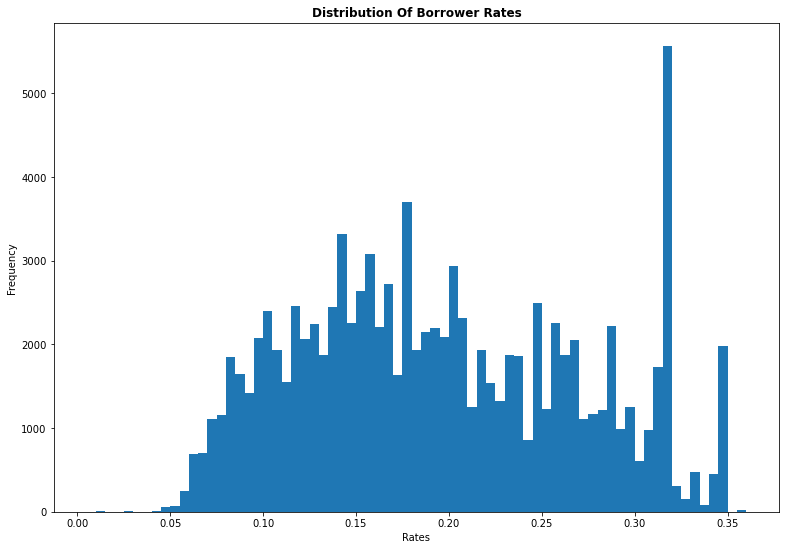

In [409]:
#Let's make a function to use this function for visualizing our plots later also.
def hist_plot(data,x,bins,xlabel,title):    
    plt.figure(figsize=[13,9])
    plt.hist(data = data, x = x, bins=bins)
    plt.title(title, weight='bold')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()
bins = np.arange(0.005,(loan_df['BorrowerRate'].max()+0.005), 0.005) #Extra added in here. 
hist_plot(loan_df,'BorrowerRate',bins,'Rates','Distribution Of Borrower Rates')

In here we see that borrower rate prices in the dataset take on a range of values from about 0.05 at the lowest to about 0.4 at the highest.

When we check the plot the most common borrower rate is approximately between 0.3 and 0.35 and the distribution of borrower rates take on a multimodal shape in this plot also. 

#### Distribution Of Investors

Investors are the number of investors that funded the loan. Lets check them in here. 

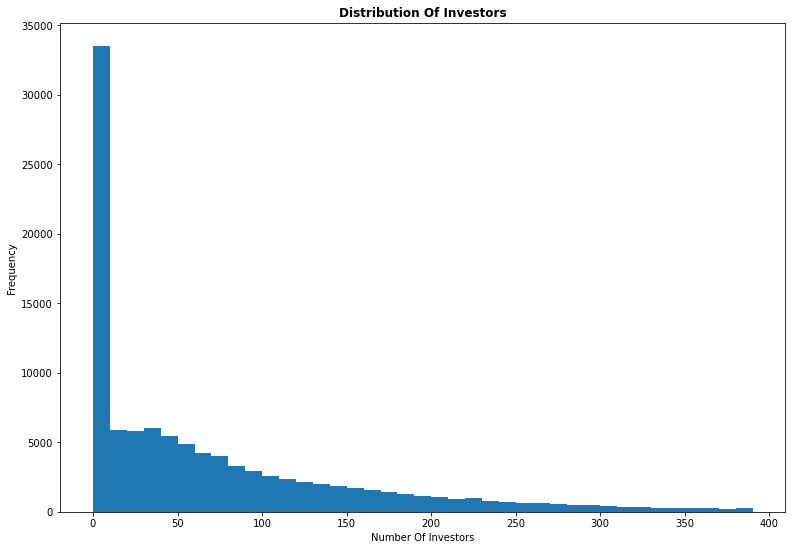

In [410]:
#Let's use our defined plot function in here in order to remove repetitive codes.
bins = np.arange(0,(loan_df['Investors'].max()+5),10)
hist_plot(loan_df,'Investors',bins, 'Number Of Investors','Distribution Of Investors')

We see in here that a large proportion of investors take place between 0-20. And they are gradually decreasing until the end of the plot reached. And also it is very rare seen that over 20-50 investors participate to fund the loan. 

Now I want to see some distributions of the other categorical variables like BorrowerState, LoanStatus and IncomeRange.

In [411]:
#I will define a function to make 3 sub count plots (x,y,z) of BorrowerState, LoanStatus and IncomeRange in here. 
def sub_countplot(data,x,y,z):
    fig, ax = plt.subplots(nrows=3, figsize = [27,13])
    default_color = sns.color_palette()[0]
    g=sns.countplot(data = data, x = x, color = default_color, ax = ax[0])
    g=sns.countplot(data = data, x = y, color = default_color, ax = ax[1])
    g=sns.countplot(data = data, x = z, color = default_color, ax = ax[2])
    plt.suptitle('Distribution Of The Variables', weight='bold',ha='center')
    plt.show()

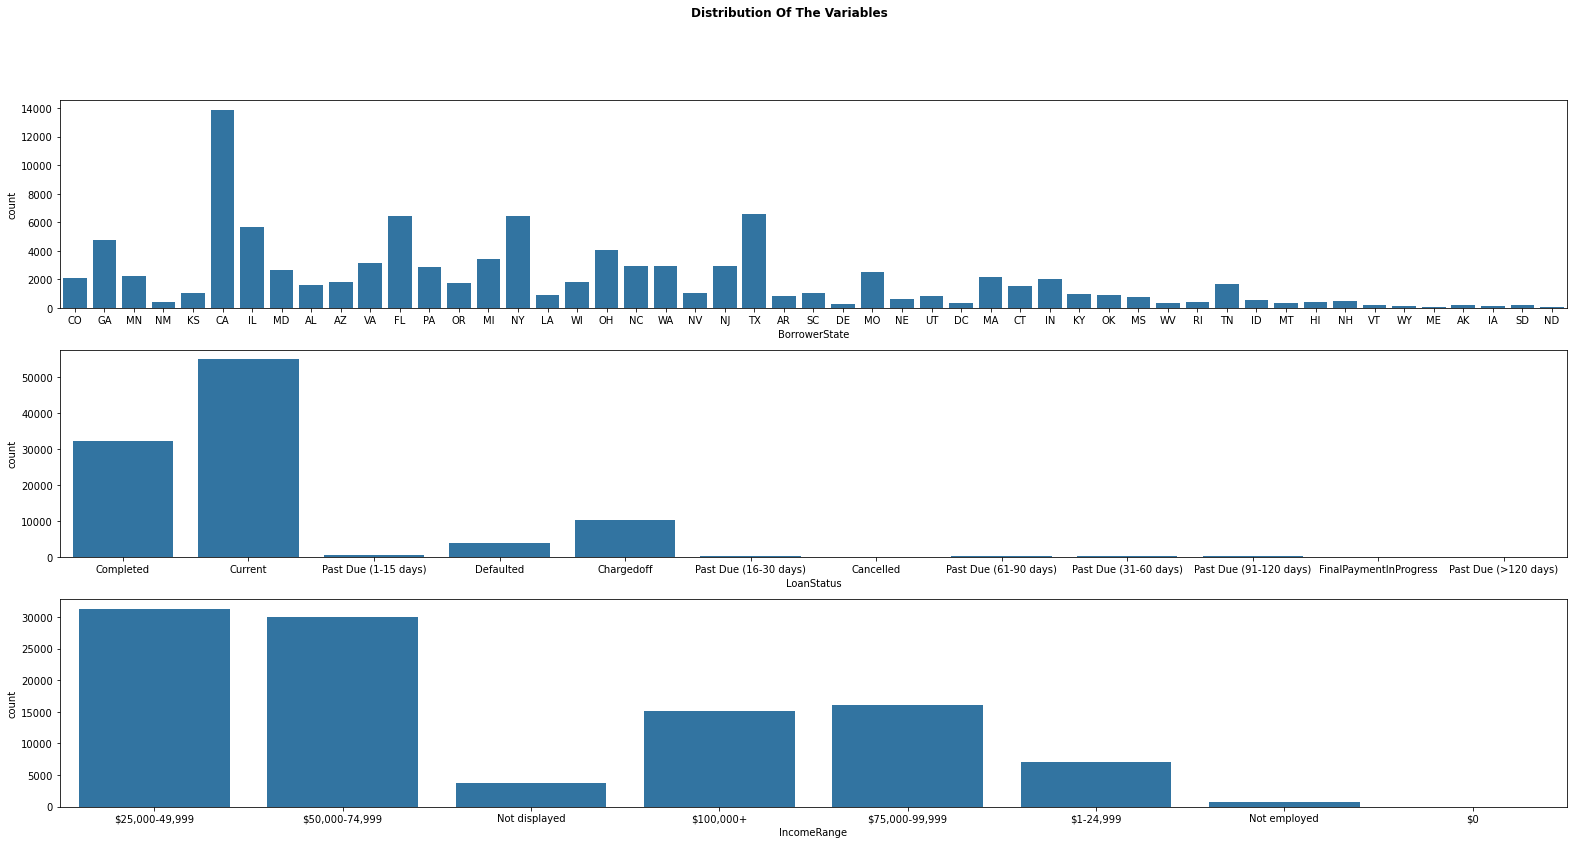

In [412]:
sub_countplot(loan_df,'BorrowerState','LoanStatus','IncomeRange')

In here most of the borrowers are from CA (California). The closest ones to the CA are TX and NY. The least borrowers are from WY, ME and ND. When I check the loan status the most biggest parts in the plot are completed and current loans. Generally we can say that there does not seem to be much of a payment problem for the loans. According to the income range we can see that most of the borrowers' incomes are between 25k-75k usd and I see that borrowers with income over 100k usd are higher than the borrowers with income between 75k-100k usd.

I'll now look at the other numeric features in the data to see if any of them hold interesting properties.

In [413]:
#I will define another function to use for other variables in here. 
def hist_plot2(data,variables):   
    fig, ax = plt.subplots(nrows=len(variables), figsize = [13,13])
    variables = variables
    for i in range(len(variables)):   
        var = variables[i]
        bins = 50
        ax[i].hist(data = data, x = var, bins = bins)
        ax[i].set_xlabel('{}'.format(var))
        ax[i].set_ylabel('Frequency')
    plt.suptitle('Distribution Of The Variables', weight='bold',ha='center')
    plt.show()

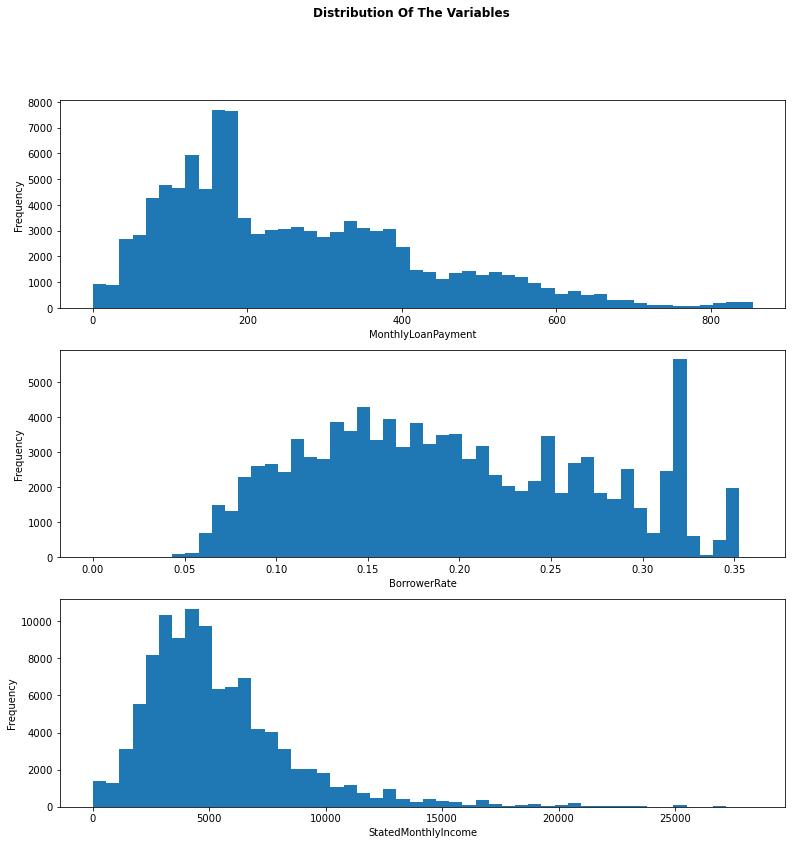

In [414]:
variables = ['MonthlyLoanPayment','BorrowerRate','StatedMonthlyIncome']
hist_plot2(loan_df,variables)

In all graphs we see multimodal plots. When we look deeper to the plots we see that the most common seen monthy loan payment is 
approximately 170-180 usd, monthly stated income is 3500 usd, over 25k usd is very rare and mostly the borrower rates are 0.15 and between 0.30-0.32. And we can see that the shape of the MonthlyLoanPayment and StatedMonthlyIncome are similar to one another.

Now lets look over the distribution of other numeric features Investors and Term in here :

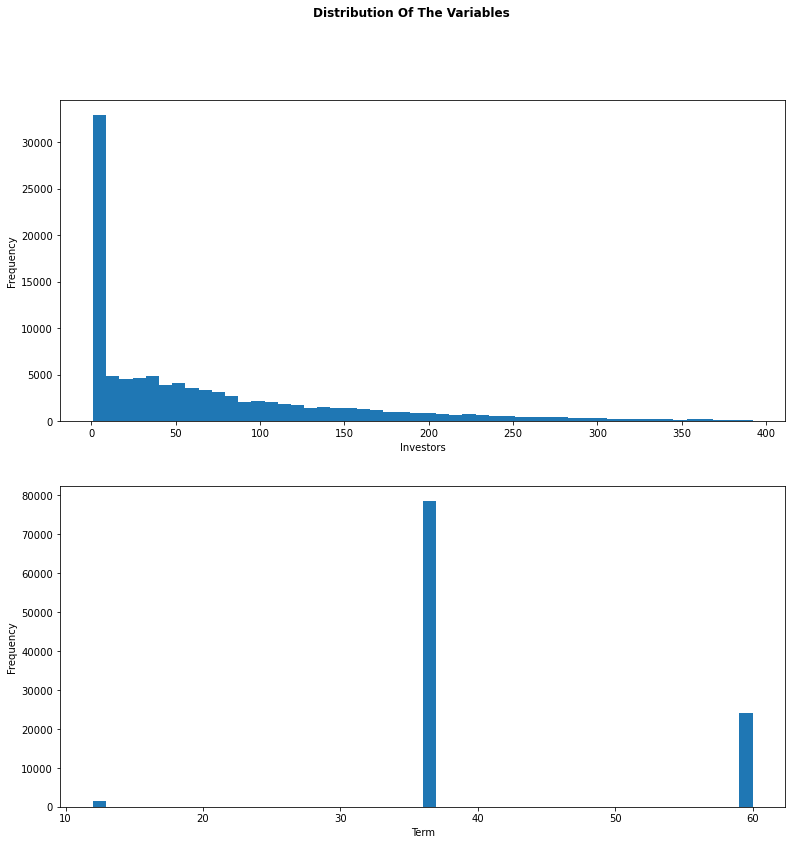

In [415]:
variables = ['Investors','Term']
hist_plot2(loan_df,variables)

In this stacked plots we can see that borrowers use mostly 36 months for loans and number of investors are specifically between 0-20.

## Bivariate Exploration 

Now I want to look at the pairwise correlations in the data.

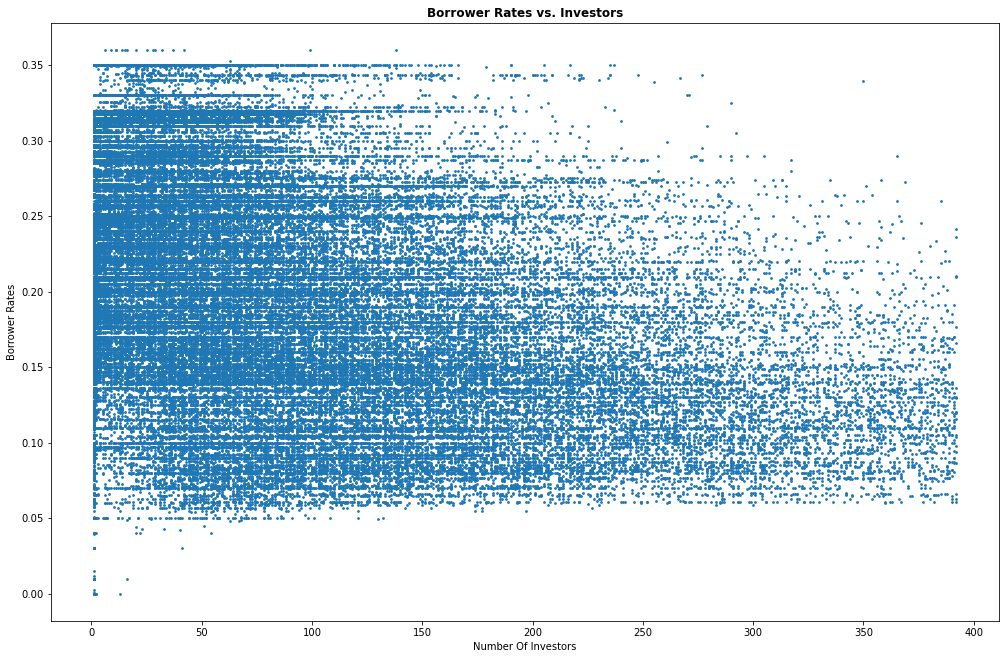

In [416]:
plt.figure(figsize = [17, 11])
plt.scatter(data = loan_df, x = 'Investors', y = 'BorrowerRate', s=3) #We can use alpha parameter instead of s 
                                                                      #when there are a large number of observations.
plt.title('Borrower Rates vs. Investors', weight='bold')
plt.xlabel('Number Of Investors')
plt.ylabel('Borrower Rates')
plt.show()

When we look at the density of the data points in here, it may be quite complicated. However, when we check the deeper points we see that Borrower Rates and Investors together produce an approximately negative relationship. In particular as borrower rates increase number of investors decrease yet we see that the most common data distribution is limited up to 200 investors. 

Eventhough this limit is still a big limit for the rest of the data, after this limit we still see bigger number of investors but very rare. It is seen that investments are made in loans with lower interest rates commonly. As the number of investors increases, the density is especially seen at 0.05-0.15 scale of the borrower rates. 

In [417]:
#Extracting the numeric data
loan_numeric_df=loan_df.select_dtypes(include=np.number)
loan_numeric_df.head()

,BorrowerRate,Investors,MonthlyLoanPayment,StatedMonthlyIncome,Term
0,0.1580,258.0,330.43,3083.0,36.0
1,0.0920,1.0,318.93,6125.0,36.0
2,0.2750,41.0,123.32,2083.0,36.0
3,0.0974,158.0,321.45,2875.0,36.0
4,0.2085,20.0,563.97,9583.0,36.0


In [418]:
loan_numeric_df.corr()

,BorrowerRate,Investors,MonthlyLoanPayment,StatedMonthlyIncome,Term
BorrowerRate,1.000000,-0.259615,-0.247294,-0.179029,0.009959
Investors,-0.259615,1.000000,0.273122,0.099453,-0.037313
MonthlyLoanPayment,-0.247294,0.273122,1.000000,0.360500,0.154442
StatedMonthlyIncome,-0.179029,0.099453,0.360500,1.000000,0.085048
Term,0.009959,-0.037313,0.154442,0.085048,1.000000


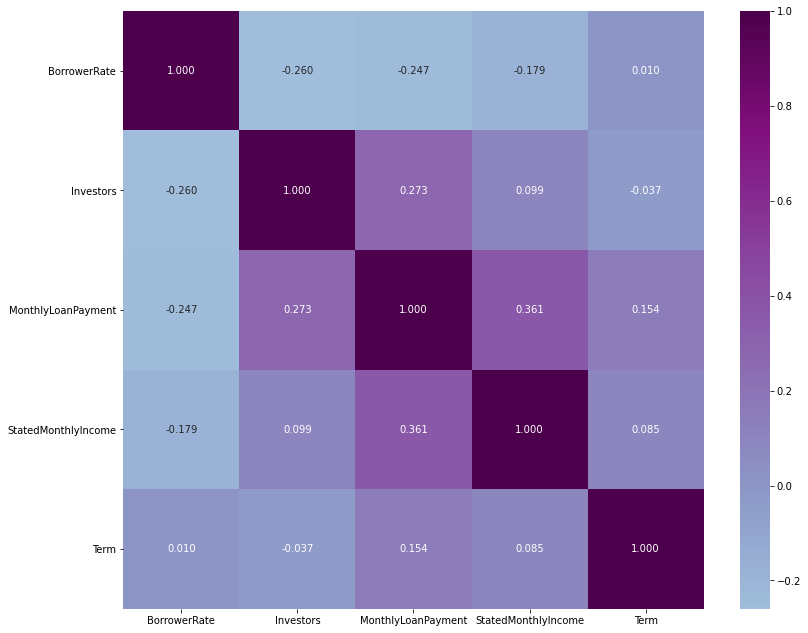

In [419]:
# Correlation plot
g=plt.figure(figsize = [13,11])
g=sns.heatmap(loan_numeric_df.corr(), annot = True, fmt = '.3f', cmap = 'BuPu', center = 0)
g.set_xticklabels(g.get_xticklabels(), rotation=0, horizontalalignment='center')
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
g;

In [420]:
#We will make a plot matrix with the sample including 20000 variables so that plots are clearer and they render faster.
print("loan_df.shape=",loan_df.shape)
loan_num_samp_df = loan_numeric_df.sample(n=20000, replace = False)
print("loan_num_samp_df.shape=",loan_num_samp_df.shape)

loan_df.shape= (104046, 9)
loan_num_samp_df.shape= (20000, 5)


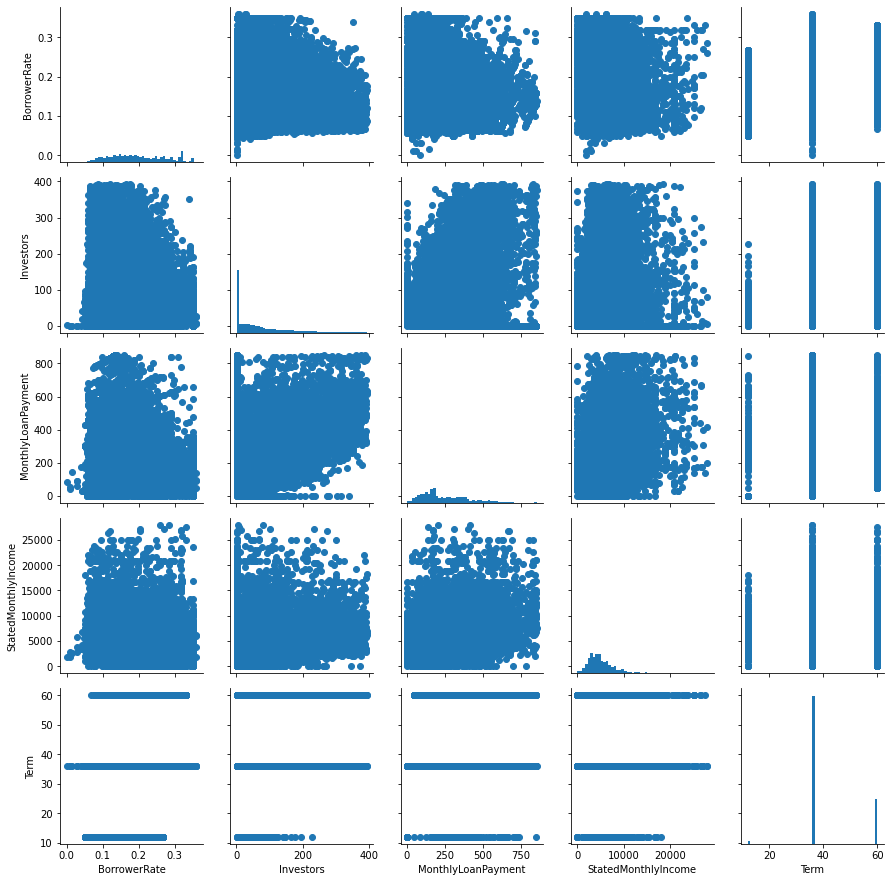

In [421]:
g = sns.PairGrid(data = loan_num_samp_df) #PairGrid plot for numerical variables in here.
g = g.map_diag(plt.hist, bins = 50) #diagonal map is the histogram
g.map_offdiag(plt.scatter) #non-diagonal map is the scatter plot 
g;

Though these numeric variables do not have strong relationships among each other, in here we can only see some notable relationships between Investors-MonthlyLoanPayment and StatedMonthlyIncome-MonthlyLoanPayment.
We see that as number of investors increase, monthy loan payments for those loans increase and likewise as stated monthly income increases, monthly loan payments for those loans increase. 

Let's look at how "MonthlyLoanPayment" and Investors" correlate with some of the categorical variables such as "IncomeRange" and "LoanStatus".

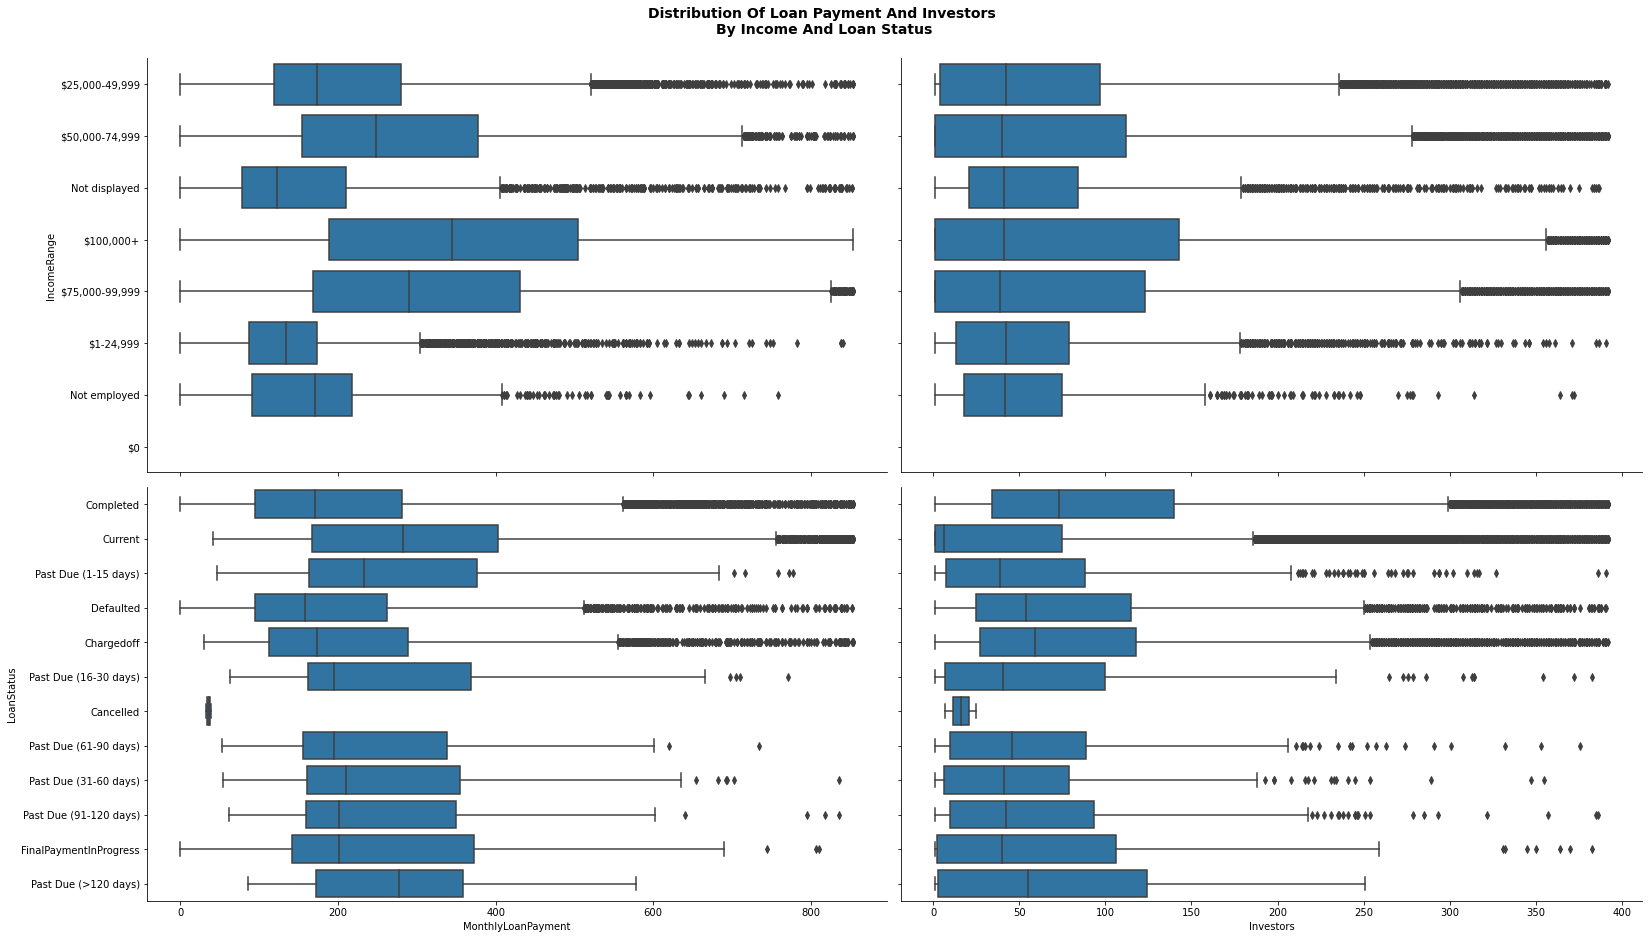

In [422]:
categoric_vars_samp=['IncomeRange','LoanStatus'] 
g = sns.PairGrid(data = loan_df, x_vars = ['MonthlyLoanPayment','Investors'], y_vars = categoric_vars_samp,
                 size = 15, aspect = 0.5) #x_vars are numerical variables, y_vars are categorical variables in here.  
g.map(sns.boxplot, color=sns.color_palette()[0], orient='h')
plt.suptitle('Distribution Of Loan Payment And Investors \nBy Income And Loan Status'.title(),y=1,fontsize=14,weight='bold')
#Set plot dimensions - figure level
g.fig.set_size_inches(23,13)
#Optimize distance between subplots
plt.tight_layout()
plt.show();

In this plot when we check the income levels, it is seen that on average of 50 investors from each type of income range and the most monthy loan payments are in the 100k usd income category on average. Also it is very interesting that when we check the loan status vs investors, on average Past Due(61-90 days) appears first. Plus, in all loan status it is seen that on average investor numbers are very close to each other. 

Let's check the Income Range vs Listing Category. In which category Income Range are seen the most ? Which are the top 10 ?

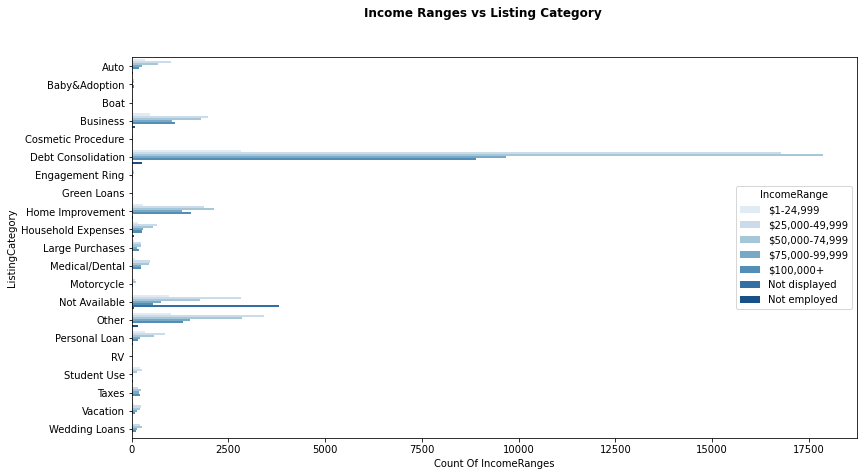

In [423]:
income_range_order=['$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed','Not employed']
plt.figure(figsize = [13,7])
g=sns.countplot(data = loan_df, y = 'ListingCategory', hue = 'IncomeRange', hue_order=income_range_order,palette = 'Blues')
g.set(xlabel='Count Of IncomeRanges')
plt.suptitle('Income Ranges vs Listing Category', weight='bold',ha='center')
g;

In this graph we see that the most parts of the loan listing category are in the category of Debt Consolidation. When we look at the details of that category the most part of income range comes from 50k-75k usd, and then 25k-50k usd. 75k-100k usd scale is very close to the 100k+ usd. 

Not Available listing category consists of many income ranges also, but we can not define the details from that part. Similarly we can see that Home Improvement and Business categories has approximately same distribution of the income ranges in this plot. 

## Multivariate Exploriation 

In [424]:
loan_df.head(3)

,BorrowerState,IncomeRange,LoanStatus,ListingCategory,BorrowerRate,Investors,MonthlyLoanPayment,StatedMonthlyIncome,Term
0,CO,"$25,000-49,999",Completed,Not Available,0.158,258.0,330.43,3083.0,36.0
1,CO,"$50,000-74,999",Current,Home Improvement,0.092,1.0,318.93,6125.0,36.0
2,GA,Not displayed,Completed,Not Available,0.275,41.0,123.32,2083.0,36.0


In [425]:
loan_df.shape

(104046, 9)

In this plot I want to explore some relationships between 2 categorical variables LoanStatus and IncomeRange, plus 1 numeric variable Investors.

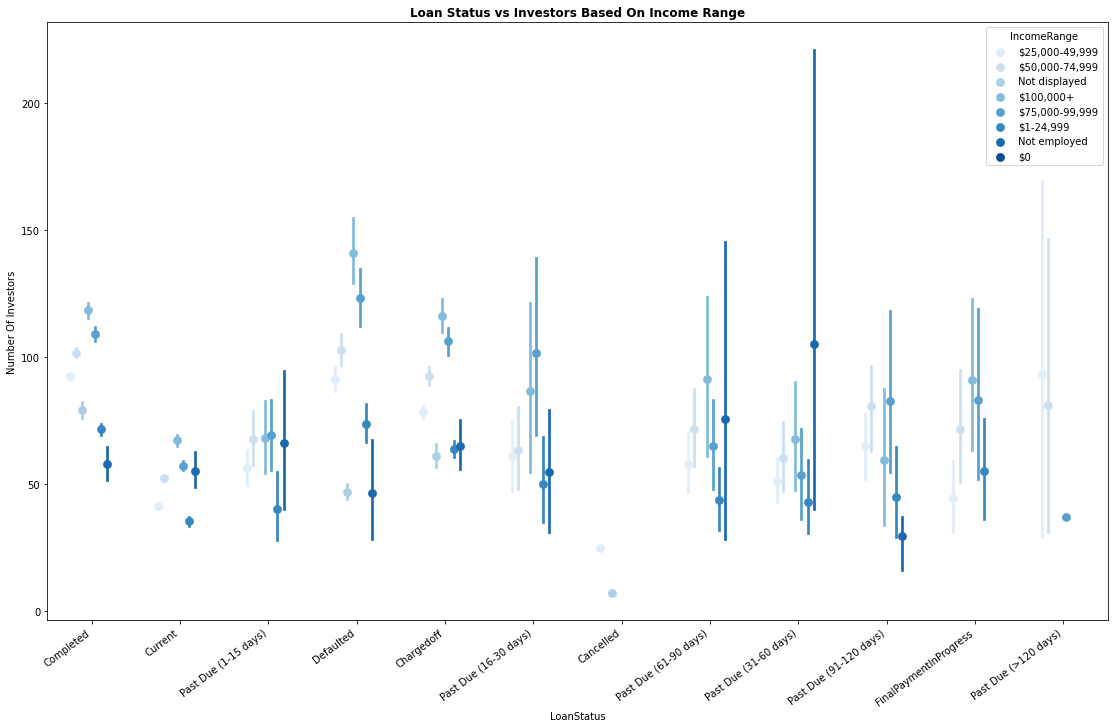

In [426]:
plt.figure(figsize = [19,11])
g=sns.pointplot(data = loan_df, x = 'LoanStatus', y = 'Investors', hue = 'IncomeRange', 
                hue_order=income_range_order, palette = 'Blues', linestyles = '', dodge = 0.49)
g.set_title('Loan Status vs Investors Based On Income Range', weight='bold')
g.set_ylabel('Number Of Investors')
g.set_xticklabels(g.get_xticklabels(),rotation=37, horizontalalignment='right')
g.set_yticklabels([],minor = True);

Let's use a strip plot too. A strip plot is a scatter plot where one of the variables is categorical.

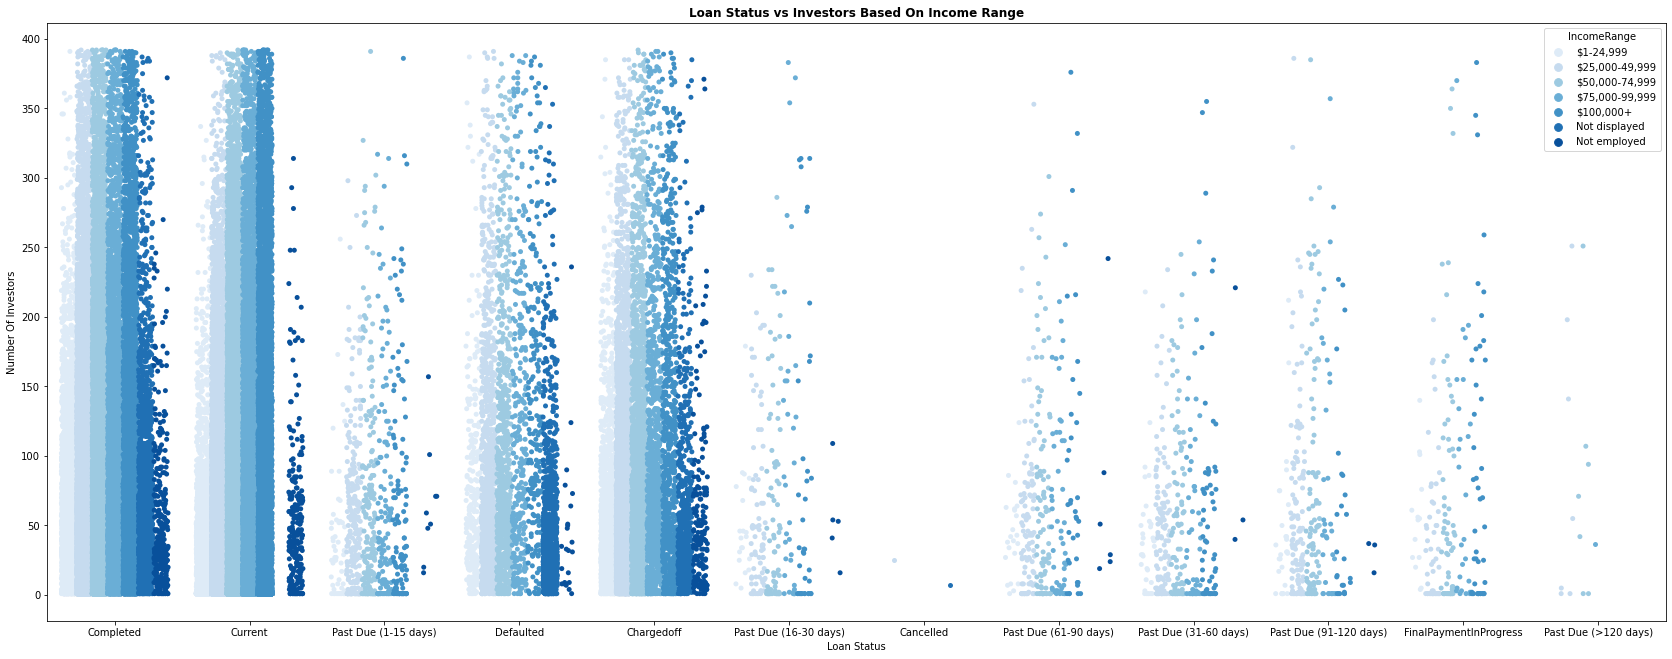

In [427]:
plt.figure(figsize = [29,11])
g=sns.stripplot(data = loan_df, x = 'LoanStatus', y = 'Investors', hue = 'IncomeRange', hue_order=income_range_order,
                palette = 'Blues', jitter=0.37, dodge = 0.49)
g.set_title('Loan Status vs Investors Based On Income Range',weight='bold')
g.set_xlabel('Loan Status')
g.set_ylabel('Number Of Investors')
g.set_xticklabels(g.get_xticklabels(),rotation=0, horizontalalignment='center')
g.set_yticklabels([],minor = True);

In a point plot it represents an estimate of central tendency (averages) for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars. So regarding this plot it seems that in all loan status categories we face approximately with the same income range categories except Cancelled and Past Due (>120 days) sub categories of LoanStatus. 

Maximum number of average investors are in the Defaulted sub loan status category and the Current sub category of loan status does not seem that it has so much average investors. When checking the error bars indication of the uncertainty around the LoanStatus sub category Past Due(31-60 days) based on IncomeRange is maximum. (Especially in 1k-24k usd) In this point plot minimum uncertainties exist in the Completed and Current sub categories of LoanStatus. (Especially in 25k-49k usd and 50k-74k usd)

With respect to the stripplot, we also see that all income range levels can be seen in Completed, Current and Chargedoff sub loan status categories. 

And for now, next I want to explore some relationships between 2 categorical variables IncomeRange and LoanStatus, plus 1 numeric variable BorrowerRate.

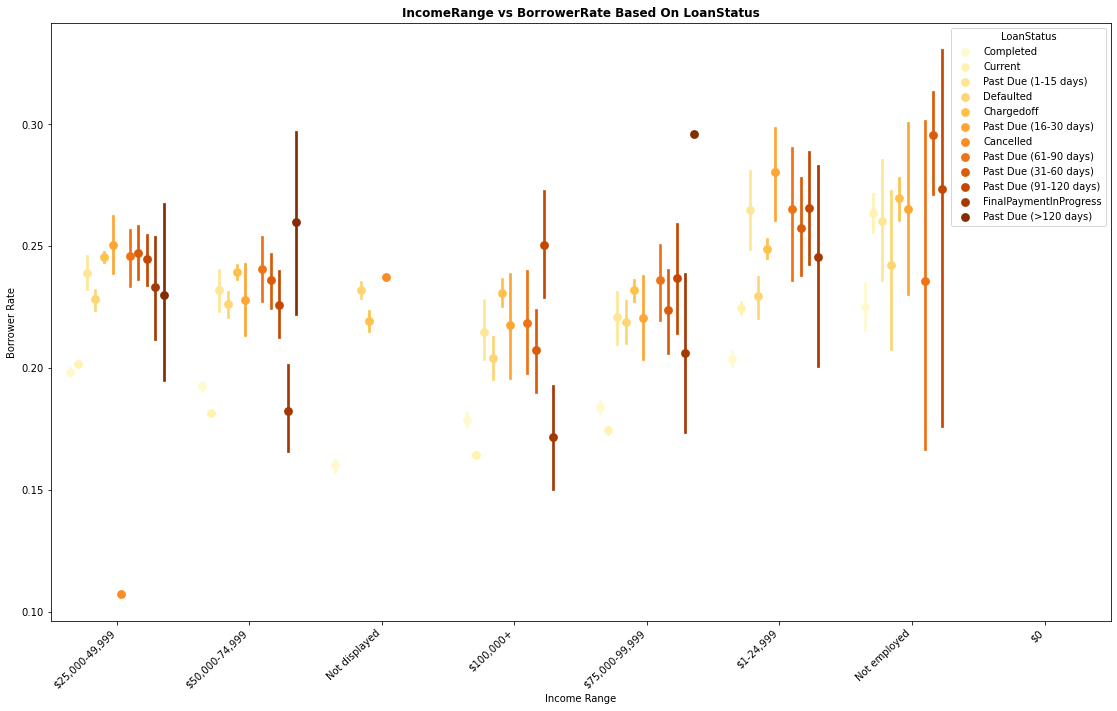

In [428]:
plt.figure(figsize = [19,11])
g=sns.pointplot(data = loan_df, x = 'IncomeRange', y = 'BorrowerRate', hue = 'LoanStatus',  
              palette = "YlOrBr", linestyles = '', dodge = 0.71)
g.set_title('IncomeRange vs BorrowerRate Based On LoanStatus', weight='bold')
g.set_xlabel('Income Range')
g.set_ylabel('Borrower Rate')
g.set_xticklabels(g.get_xticklabels(),rotation=43, horizontalalignment='right')
g.set_yticklabels([],minor = True);

Let's add another strip plot also in here for these variables. 

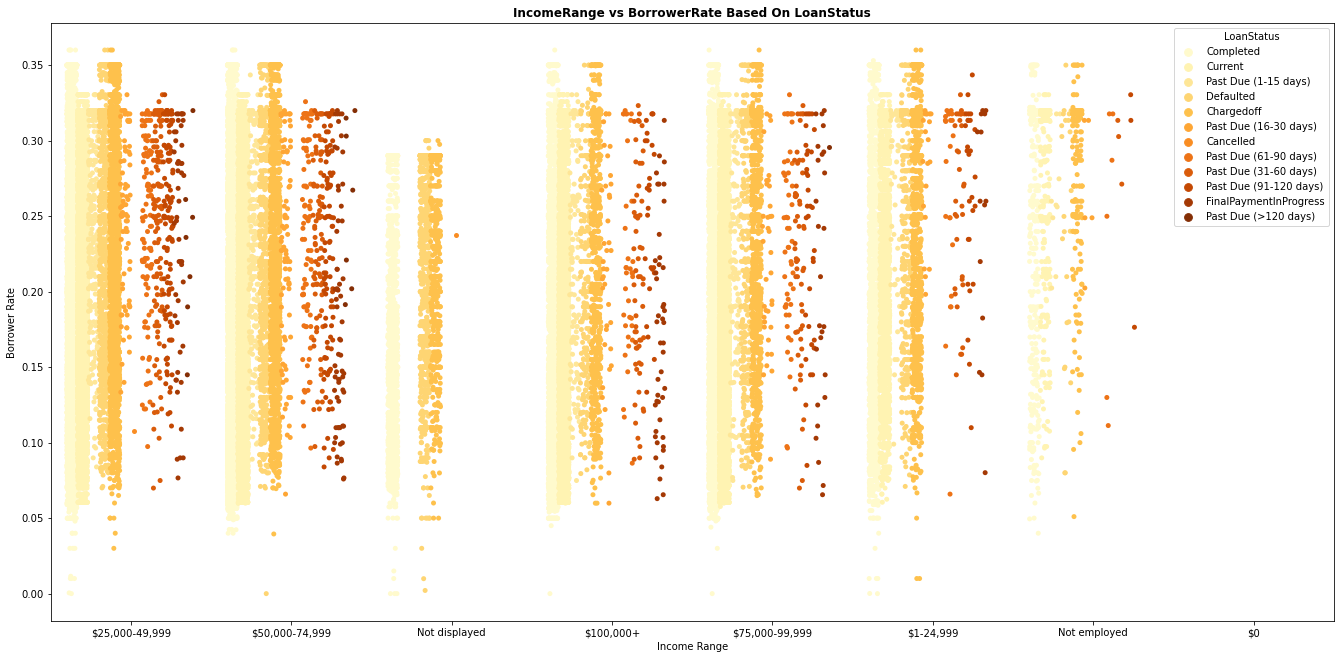

In [429]:
plt.figure(figsize = [23,11])
g=sns.stripplot(data = loan_df, x = 'IncomeRange', y = 'BorrowerRate', hue = 'LoanStatus',
                palette = "YlOrBr", jitter=0.37, dodge = 0.49)
g.set_title('IncomeRange vs BorrowerRate Based On LoanStatus', weight='bold')
g.set_xlabel('Income Range')
g.set_ylabel('Borrower Rate')
g.set_xticklabels(g.get_xticklabels(),rotation=0, horizontalalignment='center');
g.set_yticklabels([],minor = True);

According to these strip plot and point plot, it is seen that income range between 25k-49k usd consists of all the loan status categories rather than the other income range categories. Generally the borrower rate is approximately on average 0.25 for this sub group. And also it is observed that the high income ranges that is 100k+ usd, they don't have high borrower rates on average also. The maximum borrower rate for this sub group is on average 0.25 and it is in the past due category. The maximum borrower rate is in the 75k-99k usd income range category and it is similar to the past due(>120 days) sub loan status category.

As the error bars are checked, it as obvious that indication of the uncertainty around the IncomeRange sub category, Not employed is maximum based on LoanStatus. (Especially in Past Due and FinalPaymentInProgress) Plus, minimum uncertainties exist in the 25k-49k usd sub category of IncomeRange.

### Conclusions

This analyzed data is a kind of loan data consists of so many information such as listing keys, numbers, creation date etc, credit grade, term and status of loans. In the investigation period I firstly focused on borrower rate, income range, listing category, monthly loan payment and stated monthly income of the loans. Regarding this loan data set I have divided the visual analysis of the data into 3 parts. The first part is "Univariate Exploration", the second part is "Bivariate Exploration", and the third part is "Multivariate Exploration".

In our 1st part of the analysis there are some interesting patterns between attributes. Analyzing the given data I see that the most common borrower rate is approximately between 0.3 and 0.35 and the distribution of borrower rates take on a multimodal shape. Plus, I see that a large proportion of investors take place mostly between 0-50. However, it is very rare seen that over 20-50 investors participate to fund the loan. It is seen that investments are made in loans with lower interest rates commonly. As the number of investors increases, the density is especially seen at 0.05-0.15 borrower rates. As borrower rates increase, number of investors decrease yet we see that the most common data distribution is limited up to 200 investors in our scatter plot.

In the stacked count plot most of the borrowers are from CA (California) and the closest ones to the CA are TX (Texas) and NY (New York). The least borrowers are from WY (Wyoming), ME (Maine) and ND (North Dakota). Checking the income range it is obvious that most of the borrowers' incomes are between 25k-75k. When we check our multimodal distribution plots I see that the most common seen monthy loan payment is approximately 175 usd and monthly stated income is 3500 usd, over 25k usd is very rare.

In our 2nd part of the analysis I see that as number of investors increase, monthy loan payments for those loans increase and likewise as stated monthly income increases, monthly loan payments for those loans increase. It appears that when we check the loan status vs investors, on average Past Due(61-90 days) loan status appears first and in all loan status on average it is also seen that investor numbers are approximately same. When we check the income levels in here, we see that on average of 50 investors from each type of income range, besides the most monthy loan payments are in the 100k usd income category on average.

The most parts of the loan listing category are in the category of Debt Consolidation including the most part of income range comes from 50k-75k usd, and then 25k-50k usd. 75k-100k usd is very similar to the 100k+ usd. Similarly it is seen that Home Improvement and Business categories have approximately same distribution of the income ranges.

In our 3rd and the last part of the analysis in all loan status categories it appears the same income range categories except cancelled and past due (>120 days) sub categories of LoanStatus. The current sub category of loan status does not seem that it has so much average investors according to the pointplot I have created. When I check the error bars indication of the uncertainty around the LoanStatus sub category Past Due(31-60 days) based on IncomeRange is maximum. (Especially in 1k-24k usd). And also we see that minimum uncertainties exist in the Completed and Current sub categories of LoanStatus. (Especially in 25𝑘−49𝑘 usd 𝑎𝑛𝑑 50k-74k usd)

Income range between 25k-49k usd consists of all the loan status categories rather than the other income range categories. And also generally the borrower rate is approximately on average 0.25 for this sub group. Since I observe the high income ranges that is 100k+ usd, they don't have high borrower rates on average also. The maximum borrower rate for this sub group is on average 0.25. At last as I check the error bars, the uncertainty around the IncomeRange sub category, Not employed is maximum based on LoanStatus. (Especially in Past Due and FinalPaymentInProgress) and minimum uncertainties exist in the 25k-49k usd sub category of the IncomeRange.

In [ ]:
### For Generating The Slideshow
!jupyter nbconvert Prosper_Loan_Data_Project.ipynb --to slides --post serve --no-input --no-prompt 